In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_table('P0_price.tsv', index_col=0)
df.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
train_id,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


1. How many number of samples are included in the dataset?

In [3]:
# df.shape[0] returns number of rows of the dataframe; shape[1] returns number of columns

print(f"There are {df.shape[0]} samples")

There are 1482535 samples


2. List the number of missing values in each of the 8 columns.

In [4]:
# df.isnull() returns a boolean dataframe, if true means it is null, else false (not null)
# next step is to sum it across the columns
print("Number of missing values in each columns")
df.isnull().sum()

Number of missing values in each columns


name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          6
dtype: int64

3. Split the data in the column “categories” into 3 columns:“main category”, “first subcategory”, and “second subcategory”

In [5]:
'''
1. Fill the missing categories with NaN and then split the category columns into categories
2. Assign new columns respectively to the index in categories
3. Replace the entries that were initially missing with np.nan
'''

df['category_name'] = df['category_name'].fillna('NaN')
categories = df['category_name'].str.split('/',expand = True)
df['main category'] = categories[0]
df['first subcategory'] = categories[1] if categories.shape[1] > 1 else np.nan
df['second subcategory'] = categories[2] if categories.shape[1] > 1 else np.nan
df[['main category', 'first subcategory','second subcategory']] = df[['main category', 'first subcategory','second subcategory']].replace('NaN',np.nan)
df.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main category,first subcategory,second subcategory
train_id,,,,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


4. List the unique “categories” in the data.

In [6]:
'''
Assumption: categories refer to second subcategory
1. Do .unique() on second subcategory column
'''

# unique_categories = set()
# for value in df['category_name']:
#     if pd.isna(value):
#         continue  # Skip NaN values
#     unique_categories.update(value.split('/'))
# print(f"Number of unique categories: {len(unique_categories)}")    
# # unique_categories

part4 = pd.Series(df['second subcategory'].unique())
part4

0                T-shirts
1      Components & Parts
2                  Blouse
3      Home Décor Accents
4               Necklaces
              ...        
866           Dishwashers
867                  Bear
868          Artist Bears
869              Doormats
870              Ephemera
Length: 871, dtype: object

5. List the number of products each category have, ranked in descending order.

In [7]:
'''
Assumption: Category here refers to the categories in part 4 (second subcategory)
Number of products = number of second subcategories
'''
part5 = df.groupby(['second subcategory']).size()
part5

second subcategory
100 Years or Older      140
50 To 75 Years           92
75 To 100 Years          42
A-Line                  756
Above Knee, Mini      20082
                      ...  
Writing                 874
Yarn                    171
Yoga & Pilates          517
Zipper                    1
iPad                   3059
Length: 870, dtype: int64

6. Plot the sorted frequncy of categories.

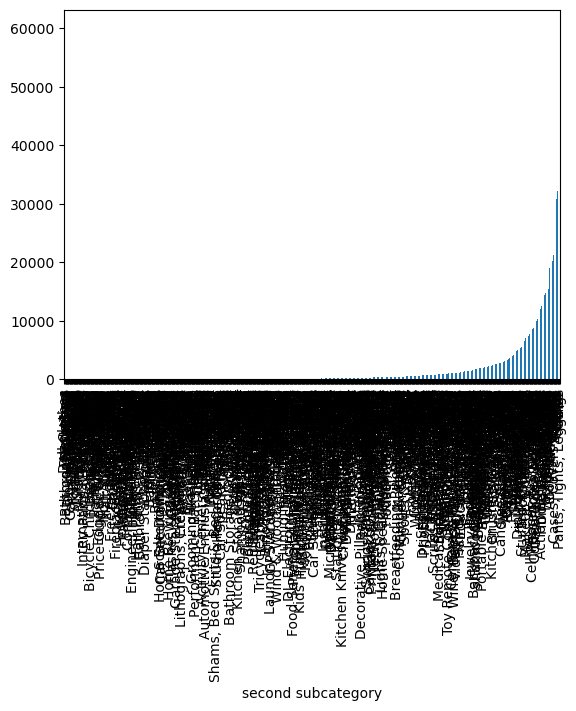

In [8]:
'''
Assumption: Categories here refers to the categories in part 5
'''
part5.sort_values().plot(kind = 'bar')
plt.show()

7. List the top 10 first subcatgories by product count.

In [9]:
part7 = df.groupby(['first subcategory']).size()
part7_sorted = part7.sort_values(ascending=False)
part7_sorted.head(10)

first subcategory
Athletic Apparel             134383
Makeup                       124624
Tops & Blouses               106960
Shoes                        100452
Jewelry                       61763
Toys                          58158
Cell Phones & Accessories     53290
Women's Handbags              45862
Dresses                       45758
Women's Accessories           42350
dtype: int64

8. List the top 10 first subcatgories by product average price.

In [10]:
part8 = df.groupby(['first subcategory'])['price'].mean()
part8_sorted = part8.sort_index(ascending=False).head(10)
part8_sorted

first subcategory
Woodworking               21.818182
Women's Handbags          58.201648
Women's Accessories       30.930531
Weddings                  20.160393
Video Games & Consoles    32.001501
Underwear                 18.097813
Trading Cards             14.788678
Toys                      21.522112
Toy                       26.132425
Tops & Blouses            18.237514
Name: price, dtype: float64

9. List the top 10 popular brands by item counts

In [11]:
'''
Assumption: popularity of brand is based on product count, more sales = more popular
'''

brand_count = df.groupby(['brand_name']).size()
sorted_brand_count = brand_count.sort_values(ascending=False)
sorted_brand_count.head(10)

brand_name
PINK                 54088
Nike                 54043
Victoria's Secret    48036
LuLaRoe              31024
Apple                17322
FOREVER 21           15186
Nintendo             15007
Lululemon            14558
Michael Kors         13928
American Eagle       13254
dtype: int64

10. Historgram of the product counts by item conditions.

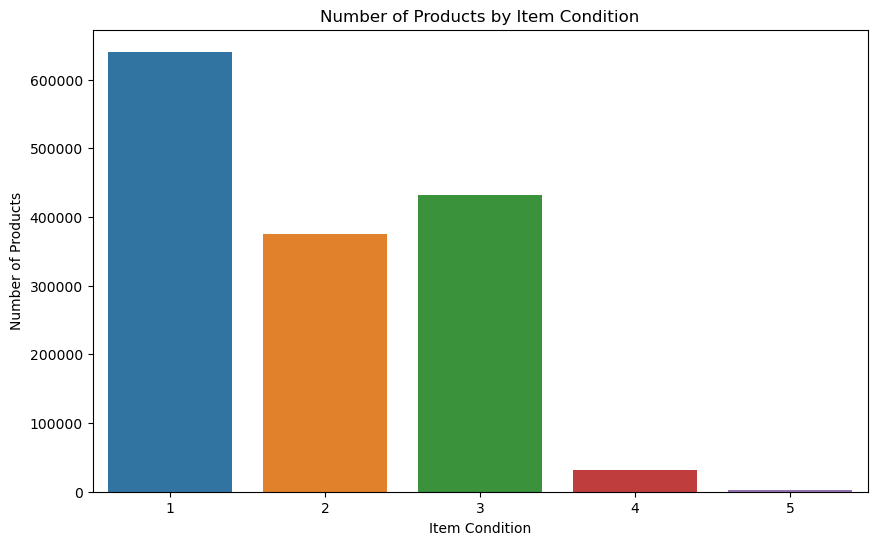

In [12]:
'''
Assumption: Question is referring to items i of condition j
'''

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='item_condition_id')
plt.title('Number of Products by Item Condition')
plt.xlabel('Item Condition')
plt.ylabel('Number of Products')
plt.show()


11. Plot and compare the price distribution for products with shipping paid by sellers and buyers respectively

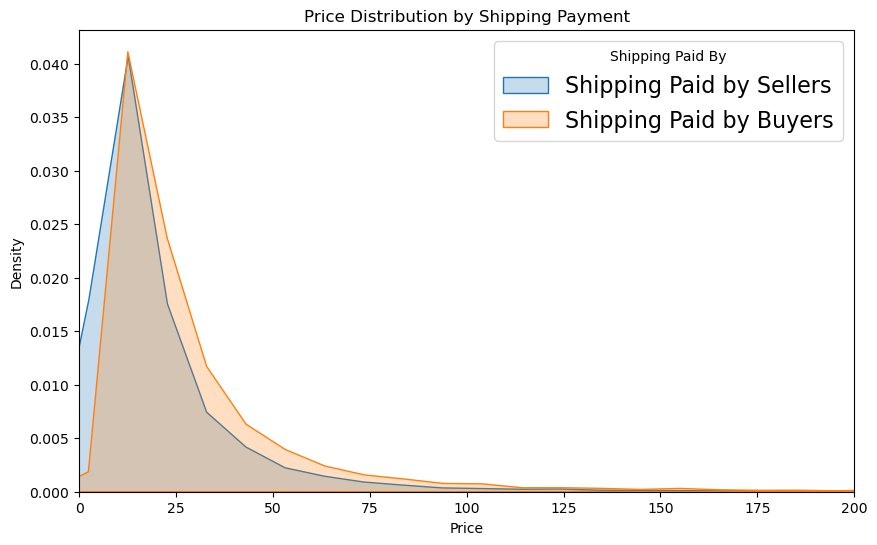

In [13]:
plt.figure(figsize=(10,6))

# Products with shipping paid by sellers
sns.kdeplot(df[df['shipping'] == 1]['price'], fill=True, linewidth=1, label='Shipping Paid by Sellers')

# Products with shipping paid by buyers
sns.kdeplot(df[df['shipping'] == 0]['price'], fill=True, linewidth=1, label='Shipping Paid by Buyers')

plt.legend(prop={'size': 16}, title = 'Shipping Paid By')
plt.title('Price Distribution by Shipping Payment')
plt.xlim(0,200)
plt.xlabel('Price')
plt.ylabel('Density')

plt.show()

The number of products paid by both sellers and buyers have roughly the same distribution

12. Replace the numbers in “item condition id” by letters, i.e., “1 ⇒ A, 2 ⇒ B,...”. List the first 5 samples after replacement.

In [14]:
dct = {1:'A',2:'B',3:'C',4:'D',5:'E'}
df['item_condition_id'] = df['item_condition_id'].replace(dct)
df['item_condition_id'].head()

train_id
0    C
1    C
2    A
3    A
4    A
Name: item_condition_id, dtype: object

13. Find out the “category” and “condition” combination such that it has highest percentage of shippings paid by sellers.

In [15]:
'''
Assumption: Category here refers to main category
'''
df['shipping_paid_by_seller'] = df['shipping'] == 1
percent_shipping_paid_by_seller = df.groupby(['main category', 'item_condition_id'])['shipping_paid_by_seller'].mean()
highest_percentage = percent_shipping_paid_by_seller.idxmax()

print(f"The category and condition combination with the highest percentage of shippings paid by sellers is: {highest_percentage}")


The category and condition combination with the highest percentage of shippings paid by sellers is: ('Electronics', 'A')


14. Find out the “brand” and “condition” combination such that it has highest percentage of shippings paid by buyers.

In [16]:
df['buyer'] = df['shipping'] == 0
percent_shipping_paid_by_buyer = df.groupby(['brand_name', 'item_condition_id'])['buyer'].mean()
highest_percentage = percent_shipping_paid_by_buyer.idxmax()

print(f"The brand and condition combination with the highest percentage of shippings paid by buyers is: {highest_percentage}")

The brand and condition combination with the highest percentage of shippings paid by buyers is: ('!iT Jeans', 'B')


15. Generate the word cloud based on the “descriptions” of all items.

In [17]:
from wordcloud import WordCloud

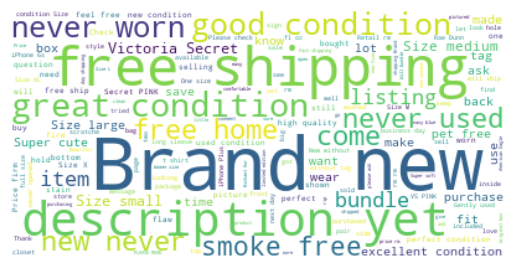

In [18]:
text = " ".join(str(descriptions) for descriptions in df['item_description'])
wordcloud_15 = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud_15, interpolation='bilinear')
plt.axis("off")
plt.show()

16. Generate the word cloud based on the “descriptions” of the top 10% most expenstive items.

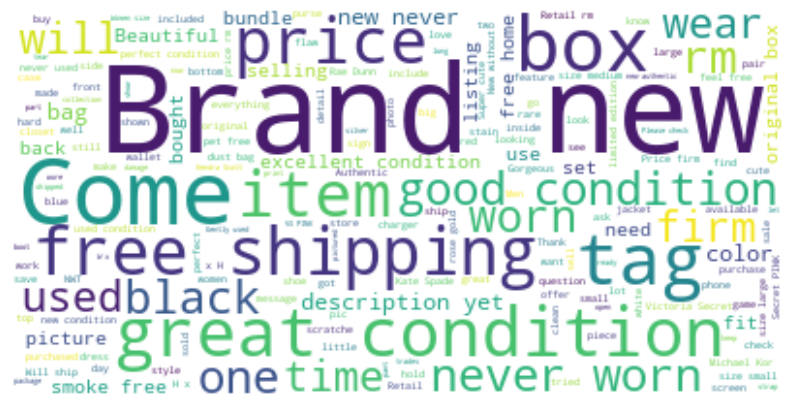

In [19]:
price_threshold = df['price'].quantile(0.9)

# Filter the dataframe for the top 10% most expensive items
top_10_percent_expensive_items = df[df['price'] > price_threshold]

# Combine all descriptions into one text
text = ' '.join(str(description) for description in top_10_percent_expensive_items['item_description'])

# Generate word cloud
wordcloud = WordCloud(background_color='white').generate(text)

# Display the generated image
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

17. For all items in the first subcategory “athletic apparel”, plot and compare the price distributions, for different conditions.

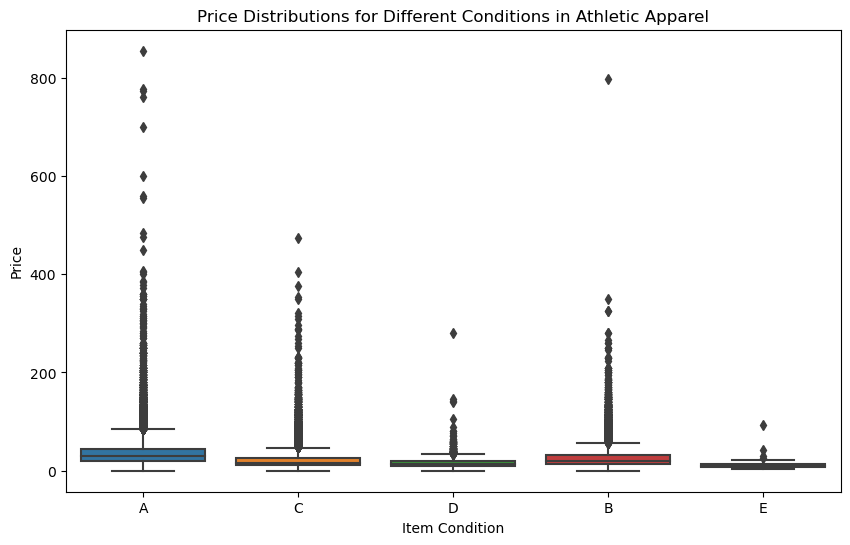

                     count       mean        std  min   25%   50%   75%    max
item_condition_id                                                             
A                  51609.0  35.863473  27.943287  0.0  19.0  30.0  45.0  855.0
B                  39701.0  25.655172  20.487244  0.0  14.0  20.0  31.0  798.0
C                  40980.0  22.498084  19.018840  0.0  12.0  16.0  26.0  473.0
D                   2040.0  15.958824  12.805378  0.0   9.0  13.0  19.0  281.0
E                     53.0  13.679245  13.226974  3.0   8.0  10.0  14.0   94.0


In [20]:
athletic_apparel_items = df[df['first subcategory'] == 'Athletic Apparel']
# athletic_apparel_items
# Create a figure and axes
plt.figure(figsize=(10,6))

# Plot the price distributions for different conditions
sns.boxplot(x='item_condition_id', y='price', data=athletic_apparel_items)

plt.title('Price Distributions for Different Conditions in Athletic Apparel')
plt.xlabel('Item Condition')
plt.ylabel('Price')

plt.show()

statistics = athletic_apparel_items.groupby('item_condition_id')['price'].describe()
print(statistics)

Mean price of A is highest while E is the lowest

18. Create a pie chart of main categories, proportional to sales revenue.

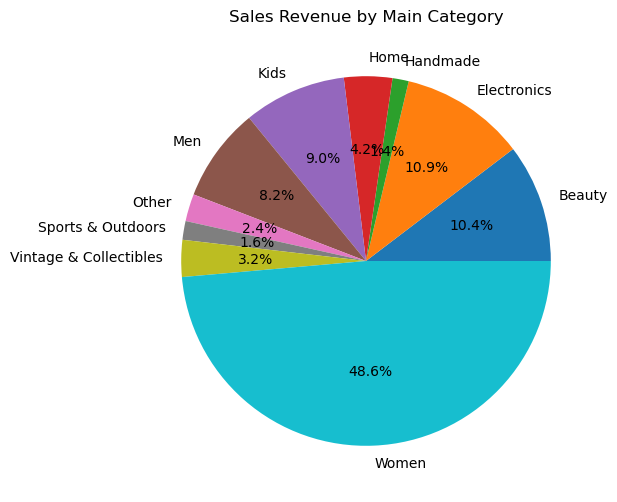

In [21]:
sales_revenue = df.groupby('main category')['price'].sum()

# Create a pie chart
plt.figure(figsize=(10,6))
plt.pie(sales_revenue, labels=sales_revenue.index, autopct='%1.1f%%')
plt.title('Sales Revenue by Main Category')
plt.show()

19. (Optional) Other exploratory analysis you feel relevant and informative.

In [24]:
df_19 = pd.read_table('P0_price.tsv',index_col=0)
relevant_columns = df_19[['price', 'item_condition_id', 'shipping']]

# Calculate the correlation matrix
correlation_matrix = relevant_columns.corr()

print(correlation_matrix)

                      price  item_condition_id  shipping
price              1.000000          -0.000807 -0.097211
item_condition_id -0.000807           1.000000 -0.191154
shipping          -0.097211          -0.191154  1.000000


There seems to be no strong correlation between the item conditions, shipping and price